## JC274-20220314 .whl metadata
Animal: **JC274** <br>
Chocolate_arm: **8** <br>
Honey_arm: **4** <br>
Sunflower_arm: 5 (not relevant for this session) <br>
---
Training_day: **8** <br>
Accuracy: **64.29%** <br>
Threshold_reached_day: **10** <br>

In [ ]:
# %matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime
mpl.rcParams['font.size'] = 15

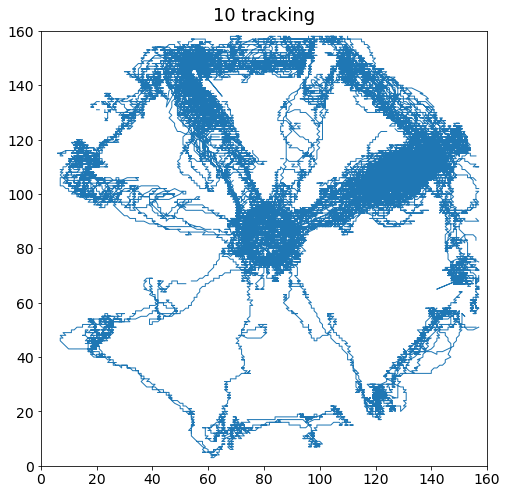

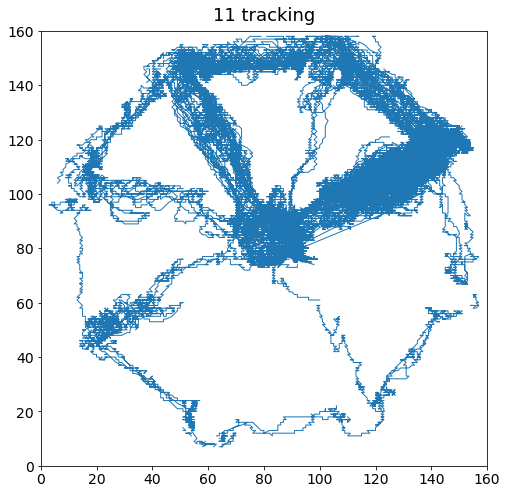

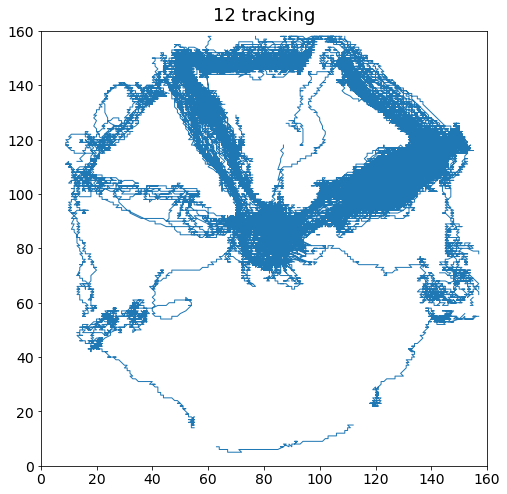

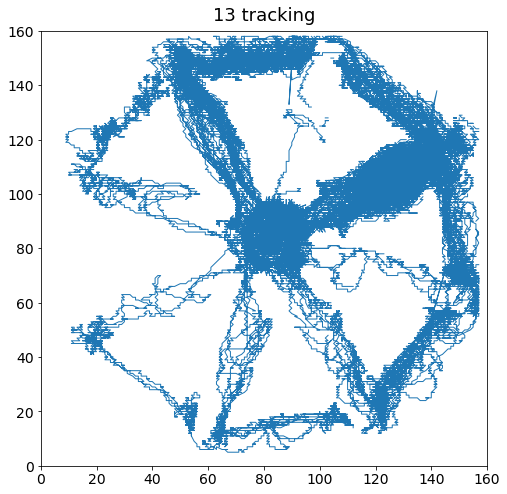

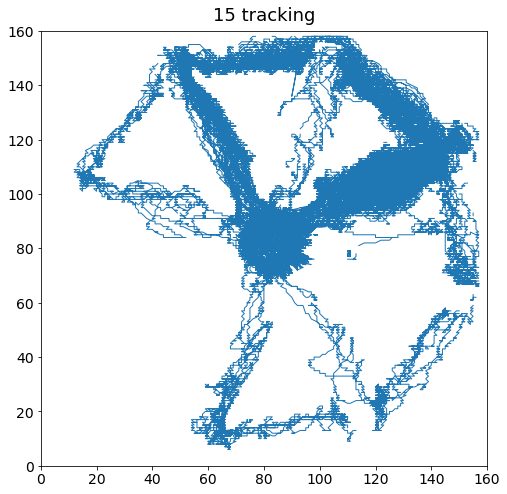

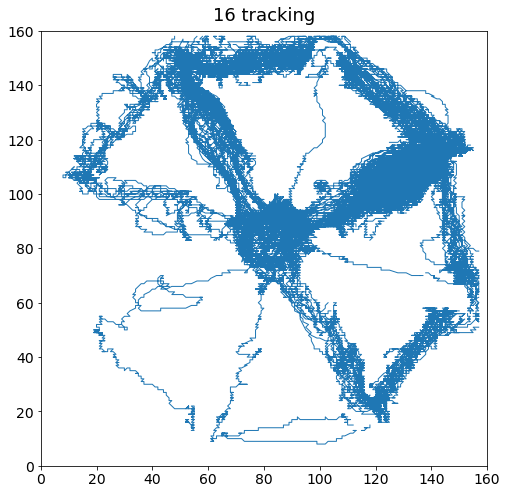

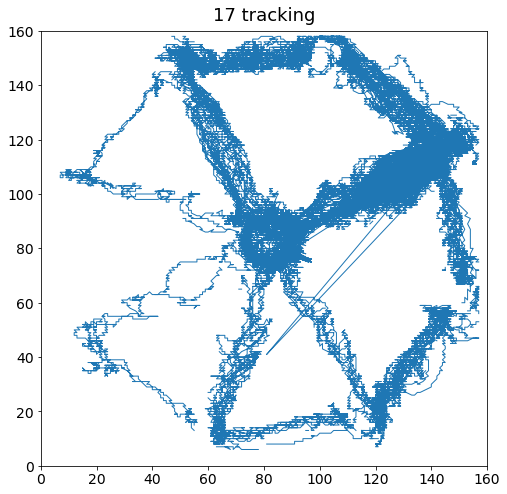

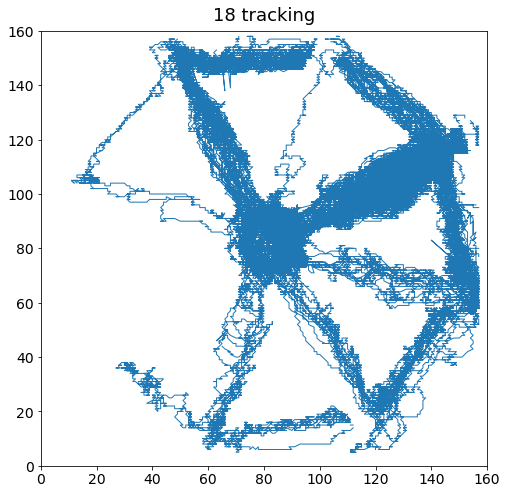

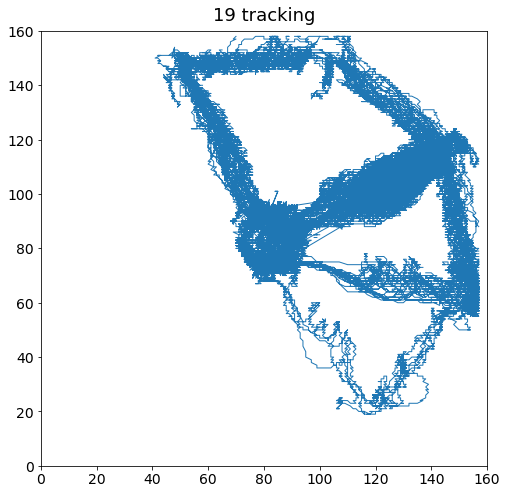

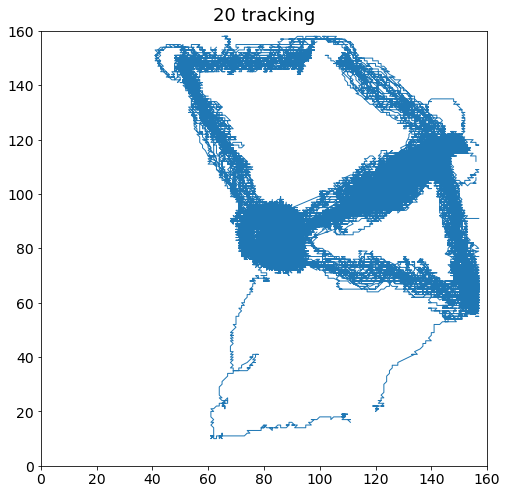

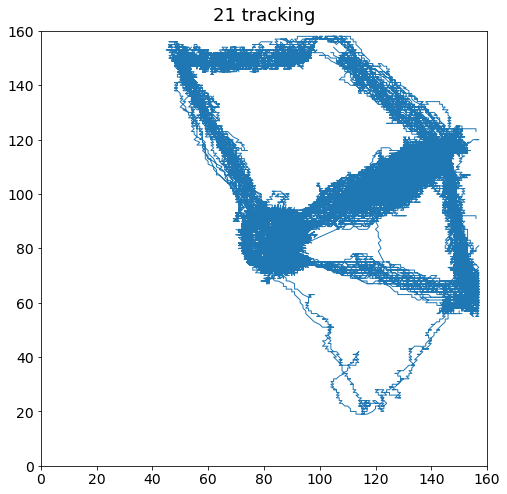

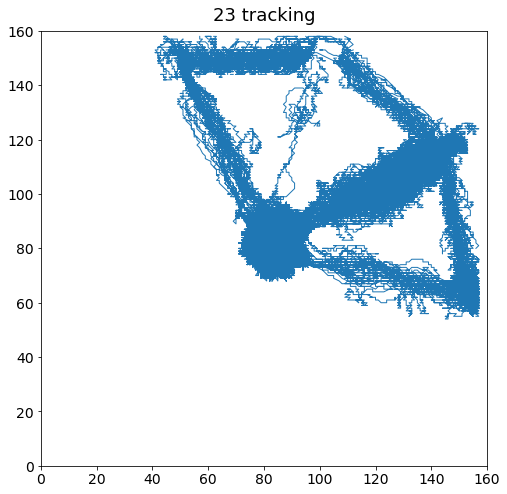

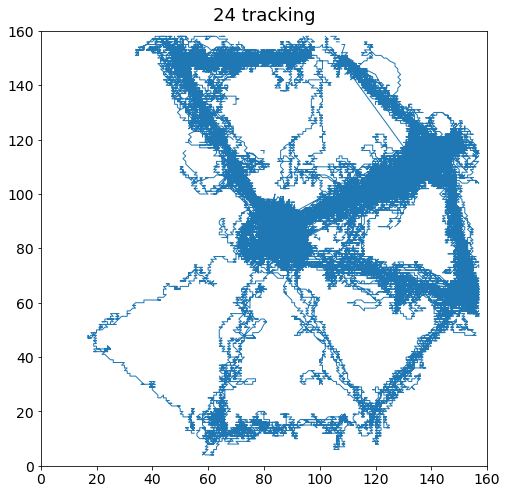

In [18]:
basenam = '202209'

xmax = 0
xmin = 160  
for num in [10,11,12,13,15,16,17,18,19,20,21,23,24]:
    basename = basenam + str(num)
    
    pos = pd.read_csv(basename+'.whl', sep=" ",
                 header=None,
                 names=["x1","y1","x2","y2","timestamps","valid"])

    pos[pos == 1023] = np.nan # replace 1023 (error value) with NaN
#     print(pos.describe())
    x1 = pos["x1"]
    if max(x1)> xmax:
        xmax = max(x1)
    if min(x1)< xmin:
        xmin = min(x1)
    
    y1 = pos["y1"]
    timestamps = pos["timestamps"]
    valid = pos["valid"]

    fig, ax = plt.subplots(figsize=(8,8))
    timenow = datetime.datetime.today().strftime("%Y%m%d-%H%M%S")
    ax.plot(x1, y1, linewidth=1)
    ax.set_title(str(num)+" tracking", fontsize=18, y=1.01)
    ax.tick_params(labelsize=14)
    plt.xlim(0,160)
    plt.ylim(0,160)
    plt.show()
    # plt.savefig(basename+"_tracking_"+timenow+".png")

In [19]:
print(xmax, xmin)

157.0 3.0


In [3]:
pos.head()

,x1,y1,x2,y2,timestamps,valid
0,84,78,1023,1023,1,1
1,84,79,1023,1023,76,1
2,83,79,84,79,601,1
3,84,79,1023,1023,1081,1
4,83,79,84,79,1561,1


In [7]:
timestamps.describe()

count    9.715610e+05
mean     2.331719e+08
std      1.346219e+08
min      1.000000e+00
25%      1.165862e+08
50%      2.331719e+08
75%      3.497578e+08
max      4.663440e+08
Name: timestamps, dtype: float64

In [8]:
print(timestamps.min(), timestamps.max())
print(timestamps.count())

1 466343959
971561


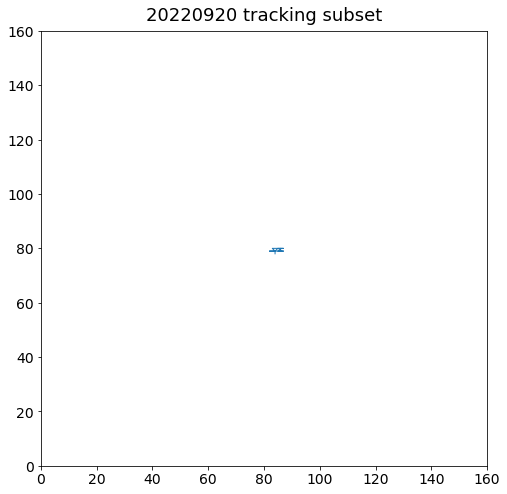

In [9]:
timestart = 0
timeend = 1_030_000
subset = pos.loc[(timestamps > timestart) & (timestamps < timeend)]

fig, ax = plt.subplots(figsize=(8,8))
timenow = datetime.datetime.today().strftime("%Y%m%d-%H%M%S")
ax.plot(subset["x1"], subset["y1"], linewidth=1)
ax.set_title(basename+" tracking subset", fontsize=18, y=1.01)
ax.tick_params(labelsize=14)
plt.xlim(0,160)
plt.ylim(0,160)
plt.show()
# plt.savefig(basename+"_tracking-subset_"+timenow+".png")

### Invalid timestamps

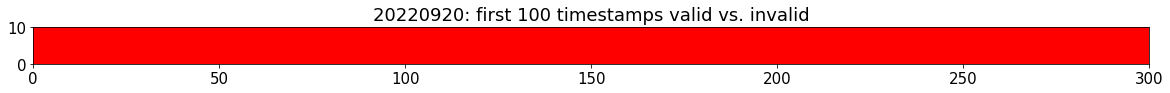

In [10]:
# For now I'm only plotting the first 100 timestamps, because otherwise it doesn't fit
subsetValid = valid[0:300]

fig, ax = plt.subplots(figsize=(20,1.5))
timenow = datetime.datetime.today().strftime("%Y%m%d-%H%M%S")
# the np function atleast_2d converts scalar and 1d arrays to 2d arrays
# bwr_r is the bwr (blue to red) cmap reversed, so that 0=red and 1=blue
ax.imshow(np.atleast_2d(subsetValid), cmap='bwr_r', extent=(0, len(subsetValid), 0, 10))
ax.set_title(basename+": first 100 timestamps valid vs. invalid", fontsize=18, y=1.01)

# plt.show()
timenow = datetime.datetime.today().strftime("%Y%m%d-%H%M%S")
# plt.savefig(basename+"_valid-timestamps-subset_"+timenow+".png")

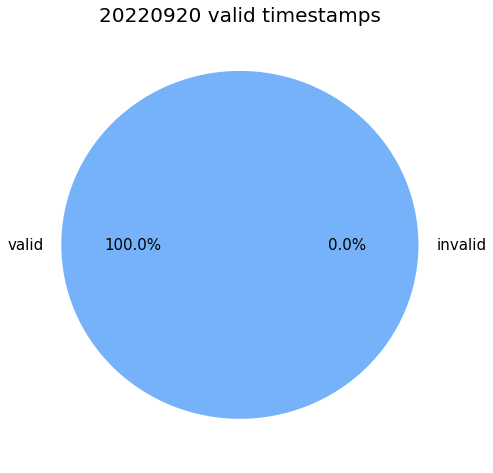

In [11]:
# I'll make a humble pie chart because I can't think of how to conserve the time data. Possibly with a matrix.
fig, ax = plt.subplots(figsize=(8,8))
labels = ['valid', 'invalid']
ax.pie([subsetValid.mean(), 1-subsetValid.mean()],
       labels=labels,
       autopct='%1.1f%%', #formatting
       colors=['#75b2f9', '#ff726f'],
      )
ax.set_title(basename+" valid timestamps", fontsize=20)
plt.show()
timenow = datetime.datetime.today().strftime("%Y%m%d-%H%M%S")
# plt.savefig(basename+"_valid-timestamps-pie-chart_"+timenow+".png")